**Business Cycles**

For Business Cycles, a key indication that we are using is the **DAX**. The DAX also known as *the Deutscher Aktien Index* or *the GER40* is a stock index that represent 40 of the largest and most liquid German companies that trade on the Frankfurt Exchange

In [107]:
#Importing libraries (include plotly)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go  

In [108]:
#Pricing dataset 
df = pd.read_excel('df.xlsx')
df.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


From the datase, we will now extract the 7th Cluster, ['1', '4', '6', '7', '8', '9'] and dig in to see if that cluster has any corelation woth the DAX

In [109]:
TS7 = df[(df['Plz'] == "['1', '4', '6', '7', '8', '9']")]  
TS7.head()


,week,wPreis,Plz,full,date
2154,2020-37,3.314264,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-14
2155,2020-38,6.106024,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-21
2156,2020-39,8.117571,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-09-28
2157,2020-40,12.717265,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-05
2158,2020-41,13.049207,"['1', '4', '6', '7', '8', '9']",A1 & A2 - geschreddert,2020-10-12


### Cluster [1, 4, 6, 7, 8, 9]

In [110]:
fig = px.line(TS7, x='date', y='wPreis', color='full', title='Weekly Prices for [1, 4, 6, 7, 8, 9] by Category')
fig.show()

We see from the visualization that in this cluster, only the **A1 & A2** category is present.

### Cluster '48', '49'

In [163]:
TS5 = df[(df['Plz'] == "['48', '49']")]  
fig = px.line(TS5, x='date', y='wPreis', color='full', title='Weekly Prices for [48, 49] by Category')
fig.show()

We see from the visualization that in this cluster, we see that TS5 contains  **A3 AND A2 & A3** categories

In [173]:
TS1 = df[(df['Plz'] == "['25', '24']")]
TS1.head()

,week,wPreis,Plz,full,date
0,2020-37,-37.519318,"['25', '24']",A2 - geschreddert,2020-09-14
1,2020-39,-40.000000,"['25', '24']",A2 - geschreddert,2020-09-28
2,2020-41,-34.853543,"['25', '24']",A2 - geschreddert,2020-10-12
3,2020-42,-27.560202,"['25', '24']",A2 - geschreddert,2020-10-19
4,2020-43,-31.937780,"['25', '24']",A2 - geschreddert,2020-10-26


In [174]:
fig = px.line(TS1, x='date', y='wPreis', color='full', title='Weekly Prices for [25,24] by Category')
fig.show()

## The Business Cycle -DAX

In [156]:
dax_df = pd.read_csv('DAX.csv')
dax_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-21,28.230000,28.230000,27.503,27.799999,25.416517,47700
1,2020-09-22,27.860001,28.027000,27.590,27.934000,25.539030,5300
2,2020-09-23,27.860001,27.860001,27.444,27.444000,25.091043,4000
3,2020-09-24,27.402000,27.650000,27.330,27.500000,25.142241,29000
4,2020-09-25,27.120001,27.450001,27.010,27.450001,25.096527,5300


In [157]:
dax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       757 non-null    object 
 1   Open       757 non-null    float64
 2   High       757 non-null    float64
 3   Low        757 non-null    float64
 4   Close      757 non-null    float64
 5   Adj Close  757 non-null    float64
 6   Volume     757 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.5+ KB


In [158]:
dax_df["Date"] =pd.to_datetime(dax_df["Date"])
dax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757 entries, 0 to 756
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       757 non-null    datetime64[ns]
 1   Open       757 non-null    float64       
 2   High       757 non-null    float64       
 3   Low        757 non-null    float64       
 4   Close      757 non-null    float64       
 5   Adj Close  757 non-null    float64       
 6   Volume     757 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.5 KB


In [159]:
dax_fig = px.line(dax_df, x='Date', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

Visually from the plot we can see that the adj close has a ver small range within the given time frame.

Now I want to extract the year and week number as per the original time series and drop the columns i dont need

In [160]:
dax_df['Year_week'] = dax_df['Date'].dt.strftime('%G-%V')
dax_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Year_week
0,2020-09-21,28.230000,28.230000,27.503000,27.799999,25.416517,47700,2020-39
1,2020-09-22,27.860001,28.027000,27.590000,27.934000,25.539030,5300,2020-39
2,2020-09-23,27.860001,27.860001,27.444000,27.444000,25.091043,4000,2020-39
3,2020-09-24,27.402000,27.650000,27.330000,27.500000,25.142241,29000,2020-39
4,2020-09-25,27.120001,27.450001,27.010000,27.450001,25.096527,5300,2020-39
5,2020-09-28,28.139999,28.230000,28.020000,28.230000,25.809652,10800,2020-40
6,2020-09-29,28.219999,28.301001,28.059999,28.301001,25.874563,6100,2020-40
7,2020-09-30,28.070000,28.218000,28.070000,28.129000,25.717310,1700,2020-40
8,2020-10-01,28.145000,28.145000,27.910000,28.059999,25.654224,5200,2020-40
9,2020-10-02,27.459999,27.980000,27.459999,27.980000,25.581085,4000,2020-40


In [161]:
dax_fig = px.scatter(dax_df, x='Year_week', y='Adj Close', title='Adj Close prices for DAX')
dax_fig.show()

In [162]:
#dax_df.set_index('Date', inplace=True)
weekly_avg = dax_df.resample('W', on='Date').mean()
#dax_df['Weekly_avg'] = dax_df.groupby('Year_week')['Adj Close'].mean()
weekly_avg

C:\Users\manja\AppData\Local\Temp\ipykernel_23548\2956615621.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-27,27.694401,27.8434,27.3754,27.625600,25.257072,18260.0
2020-10-04,28.006999,28.1748,27.9040,28.140000,25.727367,5560.0
2020-10-11,28.621200,28.7526,28.4730,28.602800,26.150490,3860.0
2020-10-18,28.510000,28.6460,28.3756,28.589000,26.137871,4540.0
2020-10-25,28.152001,28.2108,27.9262,28.047800,25.643072,4040.0
...,...,...,...,...,...,...
2023-08-27,28.519000,28.5780,28.3862,28.500000,28.500000,8280.0
2023-09-03,28.925800,29.0534,28.7720,28.949600,28.949600,3720.0
2023-09-10,28.360000,28.3875,28.2005,28.270000,28.270000,6800.0


In [116]:
dax_df = dax_df[['Date', 'Adj Close', 'Year_week', ]]
dax_df.head()

,Date,Adj Close,Year_week,Volume
0,2020-09-21,25.416517,2020-39,47700
1,2020-09-22,25.539030,2020-39,5300
2,2020-09-23,25.091043,2020-39,4000
3,2020-09-24,25.142241,2020-39,29000
4,2020-09-25,25.096527,2020-39,5300


In [176]:
dax_TS7 = pd.merge(TS7[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS5 = pd.merge(TS5[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS1 = pd.merge(TS1[['date', 'wPreis', 'full', 'week']], dax_df[['Date', 'Adj Close', 'Year_week']], left_on='date', right_on='Date', how='inner')
dax_TS5.head()


,date,wPreis,full,week,Date,Adj Close,Year_week
0,2020-09-21,-27.878925,A3 - geschreddert,2020-38,2020-09-21,25.416517,2020-39
1,2020-09-21,-27.878925,A2 & A3 - geschreddert,2020-38,2020-09-21,25.416517,2020-39
2,2020-09-28,-25.077400,A3 - geschreddert,2020-39,2020-09-28,25.809652,2020-40
3,2020-09-28,-25.077400,A2 & A3 - geschreddert,2020-39,2020-09-28,25.809652,2020-40
4,2020-10-05,-25.663645,A3 - geschreddert,2020-40,2020-10-05,25.955019,2020-41


Let now visualize the weekly price and the DAX over the same time period to see if there is any visual corelation

In [180]:

trace1 = go.Scatter(x=dax_TS7['date'], y=dax_TS7['wPreis'], mode='lines', name='Weekly Prices')
trace2 = go.Scatter(x=dax_TS7['date'], y=dax_TS7['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Time Series Comparison by Category for the cluster [1, 4, 6, 7, 8, 9] andthe daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


In [182]:
# Get unique categories
categories = dax_TS5['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = dax_TS5[dax_TS5['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close'], mode='lines', name=f'Adj Close ({category})'))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [48,49] and DAX",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [185]:
# Get unique categories
categories = dax_TS1['full'].unique()

# Create a Plotly figure
fig = go.Figure()

# Loop through each category and add a trace for it
for category in categories:
    category_data = dax_TS1[dax_TS1['full'] == category]
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['wPreis'], mode='lines', name=f'wPreis ({category})'))
    fig.add_trace(go.Scatter(x=category_data['date'], y=category_data['Adj Close'], mode='lines', name='Adj Close '))

# Customize the layout
fig.update_layout(
    title="Time Series Comparison by Category for the cluster [25,24] and DAX",
    xaxis_title="Date",
    yaxis_title="Value",
    xaxis=dict(type='date'),
)

# Show the legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

**Corelation**

From this plot, we can't really see a significant corelation, only a small negative corelation at some point when you zoom in. Let'scompute the actuall corelation 

In [189]:
correlation_df = pd.DataFrame(columns=['Category', 'Correlation', 'Clujster'])

# Calculate the correlation for each category
for category in dax_TS1['full'].unique():
    category_data = dax_TS1[dax_TS1['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '25,24'}, ignore_index=True)

for category in dax_TS5['full'].unique():
    category_data = dax_TS5[dax_TS5['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '48,49'}, ignore_index=True)

for category in dax_TS7['full'].unique():
    category_data = dax_TS7[dax_TS7['full'] == category]
    correlation = category_data['wPreis'].corr(category_data['Adj Close'])
    correlation_df = correlation_df.append({'Category': category, 'Correlation': correlation, 'Clujster': '1, 4, 6, 7, 8, 9'}, ignore_index=True)

# Display the correlation DataFrame
print(correlation_df)

                  Category  Correlation          Clujster
0       A2 -  geschreddert    -0.631151             25,24
1  A1 & A2 -  geschreddert    -0.626835             25,24
2  A2 & A3 -  geschreddert    -0.619986             25,24
3       A3 -  geschreddert    -0.584558             48,49
4  A2 & A3 -  geschreddert    -0.588304             48,49
5  A1 & A2 -  geschreddert    -0.458770  1, 4, 6, 7, 8, 9


C:\Users\manja\AppData\Local\Temp\ipykernel_23548\1593526866.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\manja\AppData\Local\Temp\ipykernel_23548\1593526866.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\manja\AppData\Local\Temp\ipykernel_23548\1593526866.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\manja\AppData\Local\Temp\ipykernel_23548\1593526866.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\manja\AppData\Local\Temp\ipykernel_23548\1593526866.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

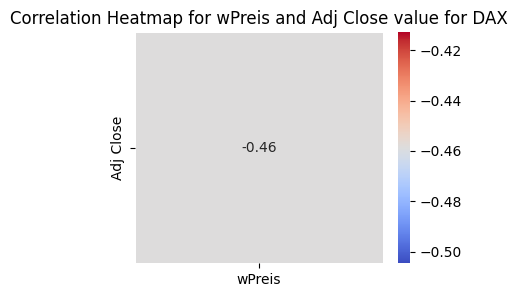

In [167]:
correlation = dax_TS7['wPreis'].corr(dax_TS5['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

Since there isn't any significant corelation on th *wPreis* and the *daily Close* value for the **DAX**

We will now lag the daily wPreis by a week and see if I will find a more or less significant corelation between the lagged wPreis and the DAX.

In [169]:
# Lag
dax_price_df_lag = dax_price_df
dax_price_df_lag.head(10)

,date,wPreis,full,week,Date,Adj Close,Year_week,Volume,wPreis_lagged_week
0,2020-09-21,6.106024,A1 & A2 - geschreddert,2020-38,2020-09-21,25.416517,2020-39,47700,NaN
1,2020-09-28,8.117571,A1 & A2 - geschreddert,2020-39,2020-09-28,25.809652,2020-40,10800,6.106024
2,2020-10-05,12.717265,A1 & A2 - geschreddert,2020-40,2020-10-05,25.955019,2020-41,2700,8.117571
3,2020-10-12,13.049207,A1 & A2 - geschreddert,2020-41,2020-10-12,26.673630,2020-42,2500,12.717265
4,2020-10-19,6.396958,A1 & A2 - geschreddert,2020-42,2020-10-19,25.576515,2020-43,9600,13.049207
5,2020-10-26,10.488447,A1 & A2 - geschreddert,2020-43,2020-10-26,24.611967,2020-44,12900,6.396958
6,2020-11-02,-4.699451,A1 & A2 - geschreddert,2020-44,2020-11-02,23.551422,2020-45,44100,10.488447
7,2020-11-09,-7.365703,A1 & A2 - geschreddert,2020-45,2020-11-09,26.376495,2020-46,16000,-4.699451
8,2020-11-16,-6.724194,A1 & A2 - geschreddert,2020-46,2020-11-16,26.653515,2020-47,8200,-7.365703
9,2020-11-23,-4.246638,A1 & A2 - geschreddert,2020-47,2020-11-23,26.605061,2020-48,6200,-6.724194


In [170]:
dax_price_df_lag['wPreis_lagged_week'] = dax_price_df_lag['wPreis'].shift(1)

In [171]:

trace1 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['wPreis_lagged_week'], mode='lines', name='Weekly Prices lagged')
trace2 = go.Scatter(x=dax_price_df_lag['date'], y=dax_price_df_lag['Adj Close'], mode='lines', name='Adj Close')

data = [trace1, trace2]

layout = go.Layout(
    title='Weekly Prices for [1, 4, 6, 7, 8, 9] Cluster vs the daily DAX',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Value')
)

fig = go.Figure(data=data, layout=layout)
fig.show()


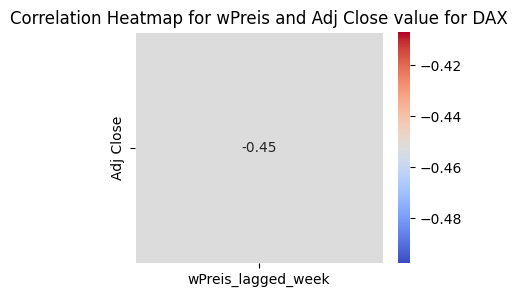

In [172]:
correlation = dax_price_df_lag['wPreis_lagged_week'].corr(dax_price_df_lag['Adj Close'])

plt.figure(figsize=(4, 3))
sns.heatmap([[correlation]], annot=True, cmap='coolwarm', linewidths=.5, xticklabels=['wPreis_lagged_week'], yticklabels=['Adj Close'])
plt.title('Correlation Heatmap for wPreis and Adj Close value for DAX')
plt.show()

At this point, we cannot deduce any strong corelation between Weekly prices(for product category A1 & A2) and the DAX.